In [47]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
invariant_analysis_df = pd.read_csv('out/invariant_analysis.csv')
invariant_analysis_df.columns = ["l_depth","sample_size","run_id","invariant_name","invariance_execution_time_ms","invariance_num_clusters","invariance_num_clusters/ms","invariance_variance","invariance_variance*ms"]


invariant_analysis_df.dtypes

l_depth                           int64
sample_size                     float64
run_id                            int64
invariant_name                   object
invariance_execution_time_ms    float64
invariance_num_clusters           int64
invariance_num_clusters/ms      float64
invariance_variance               int64
invariance_variance*ms          float64
dtype: object

In [28]:
sample_size_1 = invariant_analysis_df[
    (invariant_analysis_df['sample_size'] == 1.0) & 
    (invariant_analysis_df['run_id'] == 1)
]
sample_size_1['invariant_name_formatted'] = sample_size_1['invariant_name'].str.replace('_', ' ').str.title().str.strip()
sample_size_1

C:\Users\nschd\AppData\Local\Temp\ipykernel_19984\1734926665.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,l_depth,sample_size,run_id,invariant_name,invariance_execution_time_ms,invariance_num_clusters,invariance_num_clusters/ms,invariance_variance,invariance_variance*ms,invariant_name_formatted
72,0,1.0,1,no_invariant,107.237101,1,0.009325,5308433881,5.692611e+11,No Invariant
73,0,1.0,1,vertex_count,126.618147,14,0.110569,3649612625,4.621072e+11,Vertex Count
74,0,1.0,1,edge_count,376.238585,18,0.047842,3640400871,1.369659e+12,Edge Count
75,0,1.0,1,vertex_degrees,361.106157,91,0.252003,3554482249,1.283545e+12,Vertex Degrees
76,0,1.0,1,rank,3300.726891,14,0.004241,4064326171,1.341523e+13,Rank
77,0,1.0,1,edge_label_histogram,706.341505,149,0.210946,3192093307,2.254708e+12,Edge Label Histogram
78,0,1.0,1,node_label_histogram,439.763784,590,1.341629,401886351,1.767351e+11,Node Label Histogram
79,0,1.0,1,node_label_with_edges_histogram,1545.562506,705,0.456145,398031917,6.151832e+11,Node Label With Edges Histogram
80,0,1.0,1,edge_label_with_nodes_histogram,1258.981228,726,0.576657,293224391,3.691640e+11,Edge Label With Nodes Histogram
81,0,1.0,1,weisfeiler_lehman_graph_hash_(1),1999.343157,752,0.376124,292852707,5.855131e+11,Weisfeiler Lehman Graph Hash (1)


C:\Users\nschd\AppData\Local\Temp\ipykernel_19984\3086042458.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



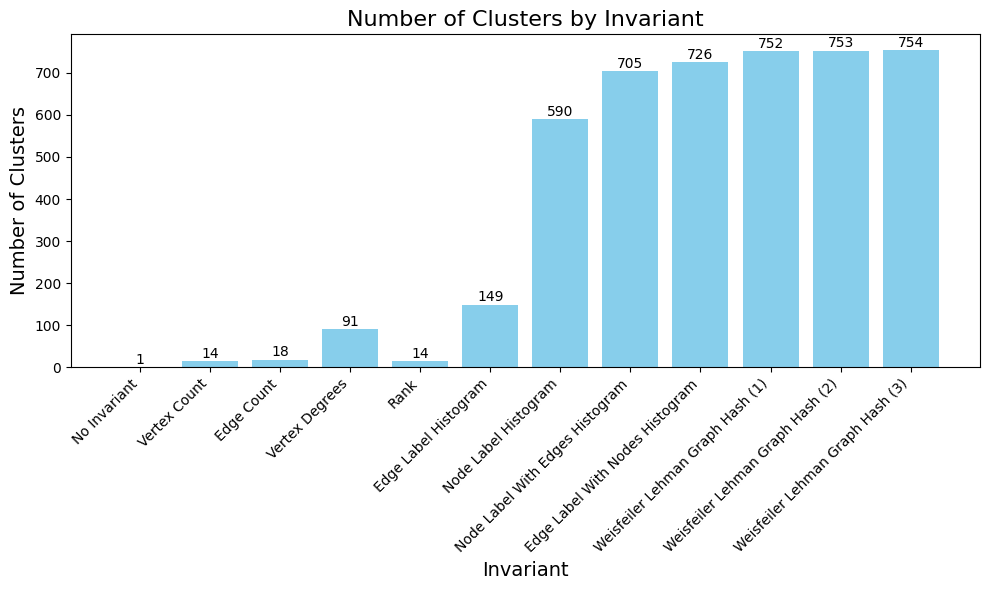

In [27]:

plt.figure(figsize=(10, 6))
plt.bar(sample_size_1['invariant_name_formatted'], sample_size_1['invariance_num_clusters'], color='skyblue')

# Add text labels on top of the bars
for i, value in enumerate(sample_size_1['invariance_num_clusters']):
    plt.text(i, value + 0.5, str(value), ha='center', va='bottom')

# Add title and axis labels
plt.title('Number of Clusters by Invariant', fontsize=16)
plt.xlabel('Invariant', fontsize=14)
plt.ylabel('Number of Clusters', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()


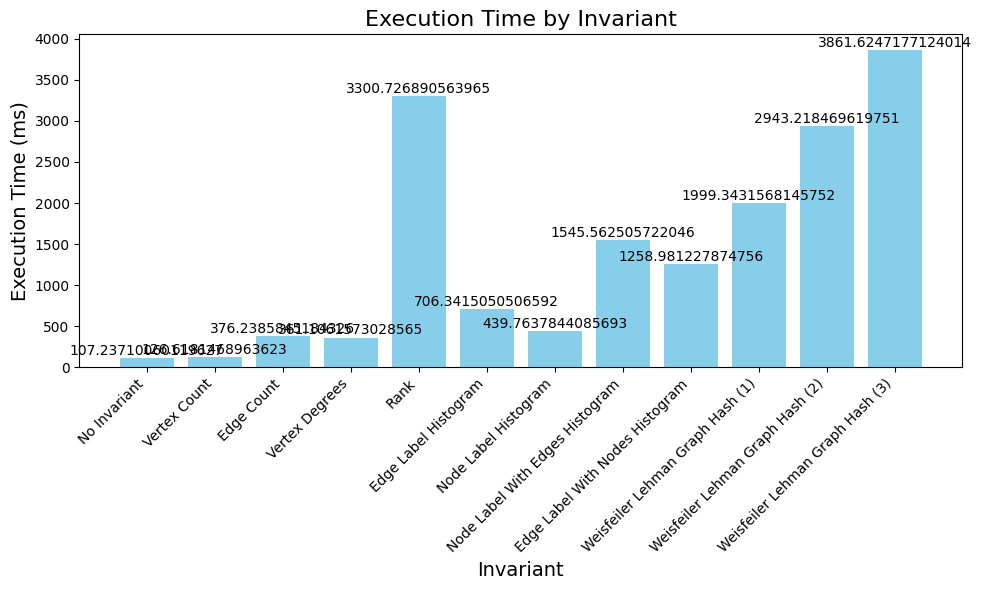

In [34]:
plt.figure(figsize=(10, 6))
plt.bar(sample_size_1['invariant_name_formatted'], sample_size_1['invariance_execution_time_ms'], color='skyblue')

# Add text labels on top of the bars
for i, value in enumerate(sample_size_1['invariance_execution_time_ms']):
    plt.text(i, value + 0.5, f"{value:,.0f}", ha='center', va='bottom')

# Add title and axis labels
plt.title('Execution Time by Invariant', fontsize=16)
plt.xlabel('Invariant', fontsize=14)
plt.ylabel('Execution Time (ms)', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()


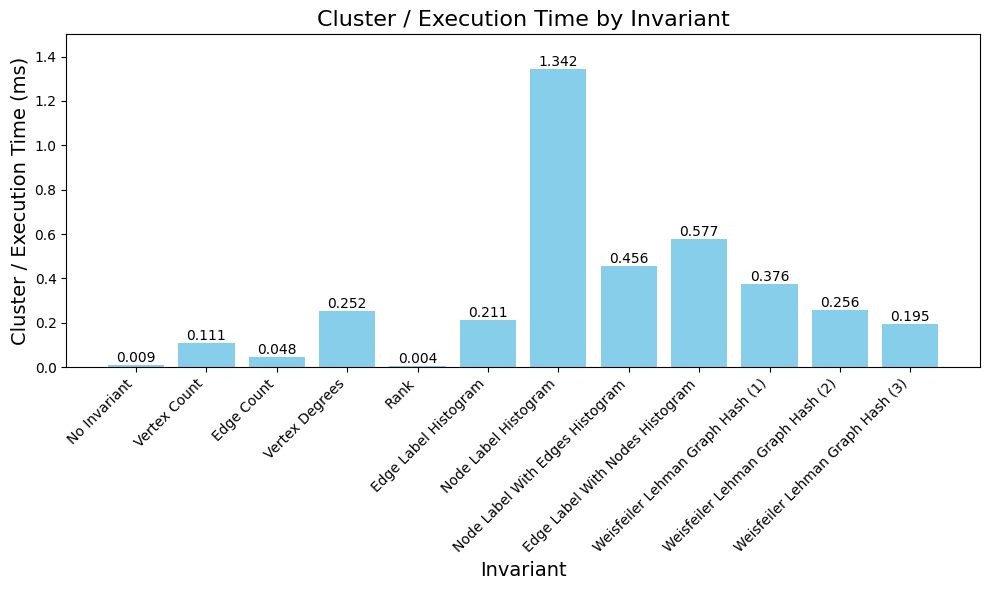

In [41]:
plt.figure(figsize=(10, 6))
plt.bar(sample_size_1['invariant_name_formatted'], sample_size_1['invariance_num_clusters/ms'], color='skyblue')

# Add text labels on top of the bars
for i, value in enumerate(sample_size_1['invariance_num_clusters/ms']):
    plt.text(i, value, f"{value:.3f}", ha='center', va='bottom')

# Add title and axis labels
plt.title('Cluster / Execution Time by Invariant', fontsize=16)
plt.xlabel('Invariant', fontsize=14)
plt.ylabel('Cluster / Execution Time (ms)', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1.5) 

# Show the plot
plt.tight_layout()
plt.show()


In [52]:
isomorphism_analysis_df = pd.read_csv('out/isomorphism_analysis.csv')
isomorphism_analysis_df.columns = ["l_depth","sample_size","run_id","invariant_name","invariance_execution_time_ms","invariance_num_clusters","invariance_num_clusters/ms","invariance_variance","invariance_variance*ms","isomorphism_execution_time_ms","isomorphism_check_count","isomorphism_num_clusters"]
isomorphism_analysis_df['invariant_name_formatted'] = isomorphism_analysis_df['invariant_name'].str.replace('_', ' ').str.title().str.strip()

isomorphism_analysis_df['total_execution_time_ms'] = isomorphism_analysis_df['invariance_execution_time_ms'] + isomorphism_analysis_df['isomorphism_execution_time_ms']
isomorphism_analysis_df

,l_depth,sample_size,run_id,invariant_name,invariance_execution_time_ms,invariance_num_clusters,invariance_num_clusters/ms,invariance_variance,invariance_variance*ms,isomorphism_execution_time_ms,isomorphism_check_count,isomorphism_num_clusters,invariant_name_formatted,total_execution_time_ms
0,0,1.0,1,no_invariant,98.239899,1,0.010179,5308433881,5.215000e+11,4.268615e+04,2321344,754,No Invariant,4.278439e+04
1,0,1.0,1,node_label_histogram,1369.417429,590,0.430840,401886351,5.503502e+11,6.492314e+03,81587,754,Node Label Histogram,7.861732e+03
2,0,1.0,1,node_label_with_edges_histogram,1622.058630,705,0.434633,398031917,6.456311e+11,6.287821e+03,78601,754,Node Label With Edges Histogram,7.909879e+03
3,0,1.0,1,edge_label_with_nodes_histogram,1243.277788,726,0.583940,293224391,3.645594e+11,5.943358e+03,72290,754,Edge Label With Nodes Histogram,7.186636e+03
4,0,1.0,1,weisfeiler_lehman_graph_hash_(1),2075.831652,752,0.362264,292852707,6.079129e+11,6.053458e+03,72128,754,Weisfeiler Lehman Graph Hash (1),8.129290e+03
5,0,1.0,1,weisfeiler_lehman_graph_hash_(2),2916.465044,753,0.258189,292852347,8.540936e+11,5.968307e+03,72110,754,Weisfeiler Lehman Graph Hash (2),8.884772e+03
6,0,1.0,1,weisfeiler_lehman_graph_hash_(3),3863.177299,754,0.195176,292851927,1.131339e+12,6.050103e+03,72105,754,Weisfeiler Lehman Graph Hash (3),9.913280e+03
7,1,1.0,1,no_invariant,110.765696,1,0.009028,5308433881,5.879924e+11,1.724729e+05,15137617,2721,No Invariant,1.725837e+05
8,1,1.0,1,node_label_histogram,1667.107105,1619,0.971143,96024141,1.600825e+11,1.351475e+04,101095,2721,Node Label Histogram,1.518185e+04
9,1,1.0,1,node_label_with_edges_histogram,2672.335386,2543,0.951602,73952049,1.976247e+11,1.167742e+04,75764,2721,Node Label With Edges Histogram,1.434975e+04


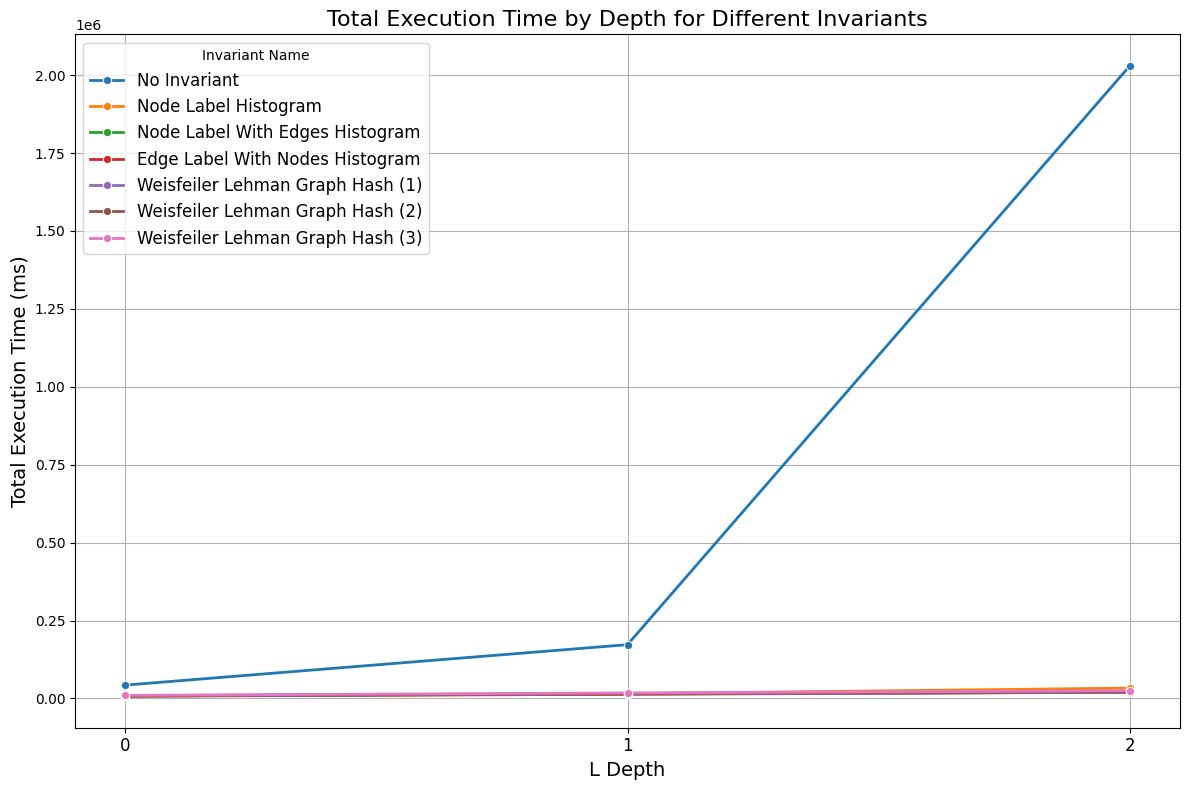

In [59]:
plt.figure(figsize=(12, 8))
sns.lineplot(
    data=isomorphism_analysis_df, 
    x="l_depth", 
    y="total_execution_time_ms", 
    hue="invariant_name_formatted", 
    marker="o",  # Adds markers for scatter points
    linewidth=2  # Line thickness
)

# Add title and labels
plt.title("Total Execution Time by Depth for Different Invariants", fontsize=16)
plt.xlabel("L Depth", fontsize=14)
plt.ylabel("Total Execution Time (ms)", fontsize=14)

# Adjust legend
plt.legend(title="Invariant Name", fontsize=12)
plt.grid(True)
#plt.yscale("log")
plt.xticks([0, 1, 2], fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

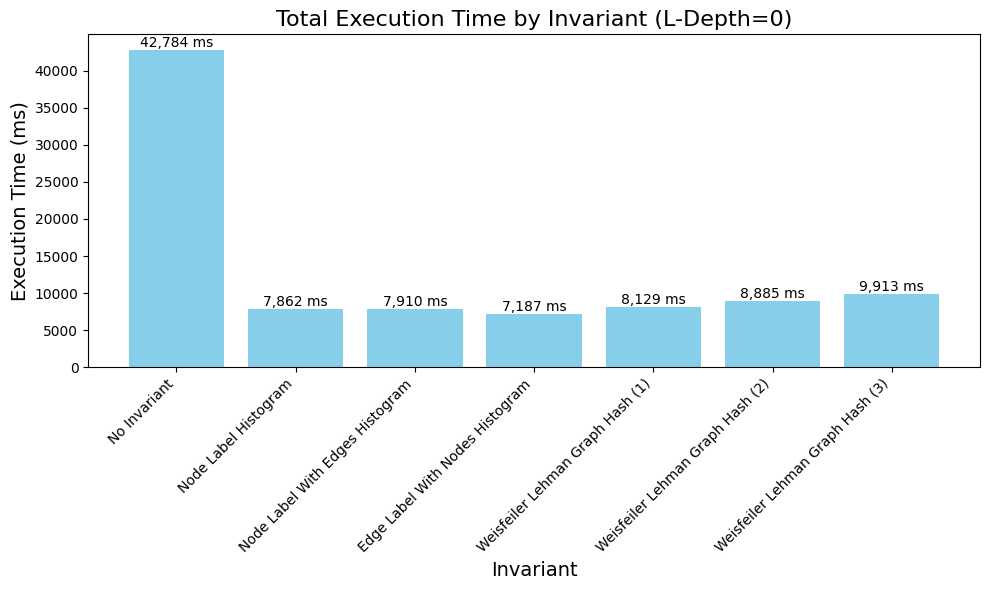

In [58]:
l_depth_0 = isomorphism_analysis_df[isomorphism_analysis_df['l_depth'] == 0]

plt.figure(figsize=(10, 6))
plt.bar(
    l_depth_0['invariant_name_formatted'],
    l_depth_0['total_execution_time_ms'], color='skyblue')

# Add text labels on top of the bars
for i, value in enumerate(l_depth_0['total_execution_time_ms']):
    plt.text(i, value + 0.5, f"{value:,.0f} ms", ha='center', va='bottom')

# Add title and axis labels
plt.title('Total Execution Time by Invariant (L-Depth=0)', fontsize=16)
plt.xlabel('Invariant', fontsize=14)
plt.ylabel('Execution Time (ms)', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()


In [63]:
isomorphism_scaling_analysis_df = pd.read_csv('out/isomorphism_scaling_analysis.csv')
isomorphism_scaling_analysis_df.columns = ["l_depth","sample_size","run_id","invariant_name","invariance_execution_time_ms","invariance_num_clusters","invariance_num_clusters/ms","invariance_variance","invariance_variance*ms","isomorphism_execution_time_ms","isomorphism_check_count","isomorphism_num_clusters"]
isomorphism_scaling_analysis_df['invariant_name_formatted'] = isomorphism_scaling_analysis_df['invariant_name'].str.replace('_', ' ').str.title().str.strip()

isomorphism_scaling_analysis_df['total_execution_time_ms'] = isomorphism_scaling_analysis_df['invariance_execution_time_ms'] + isomorphism_scaling_analysis_df['isomorphism_execution_time_ms']
isomorphism_scaling_analysis_df

,l_depth,sample_size,run_id,invariant_name,invariance_execution_time_ms,invariance_num_clusters,invariance_num_clusters/ms,invariance_variance,invariance_variance*ms,isomorphism_execution_time_ms,isomorphism_check_count,isomorphism_num_clusters,invariant_name_formatted,total_execution_time_ms
0,0,0.25,1,no_invariant,34.500360,1,0.028985,331749796,1.144549e+10,11576.686859,567151,454,No Invariant,11611.187220
1,0,0.25,1,node_label_histogram,1087.244034,370,0.340310,25105594,2.729591e+10,1687.099457,22197,454,Node Label Histogram,2774.343491
2,0,0.25,1,node_label_with_edges_histogram,482.169151,428,0.887655,24870514,1.199179e+10,1654.622078,21631,454,Node Label With Edges Histogram,2136.791229
3,0,0.25,1,edge_label_with_nodes_histogram,395.732641,439,1.109335,18420912,7.289756e+09,1477.680683,17808,454,Edge Label With Nodes Histogram,1873.413324
4,0,0.25,1,weisfeiler_lehman_graph_hash_(1),542.121887,453,0.835605,18395922,9.972832e+09,1487.543106,17764,454,Weisfeiler Lehman Graph Hash (1),2029.664993
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,0,1.00,3,node_label_with_edges_histogram,1711.326599,705,0.411961,398031917,6.811626e+11,6510.916233,79758,754,Node Label With Edges Histogram,8222.242832
59,0,1.00,3,edge_label_with_nodes_histogram,1470.405579,726,0.493741,293224391,4.311588e+11,6164.729595,72342,754,Edge Label With Nodes Histogram,7635.135174
60,0,1.00,3,weisfeiler_lehman_graph_hash_(1),2136.547327,752,0.351970,292852707,6.256937e+11,6129.399776,72120,754,Weisfeiler Lehman Graph Hash (1),8265.947104
61,0,1.00,3,weisfeiler_lehman_graph_hash_(2),3124.190569,753,0.241022,292852347,9.149265e+11,6167.870760,72110,754,Weisfeiler Lehman Graph Hash (2),9292.061329


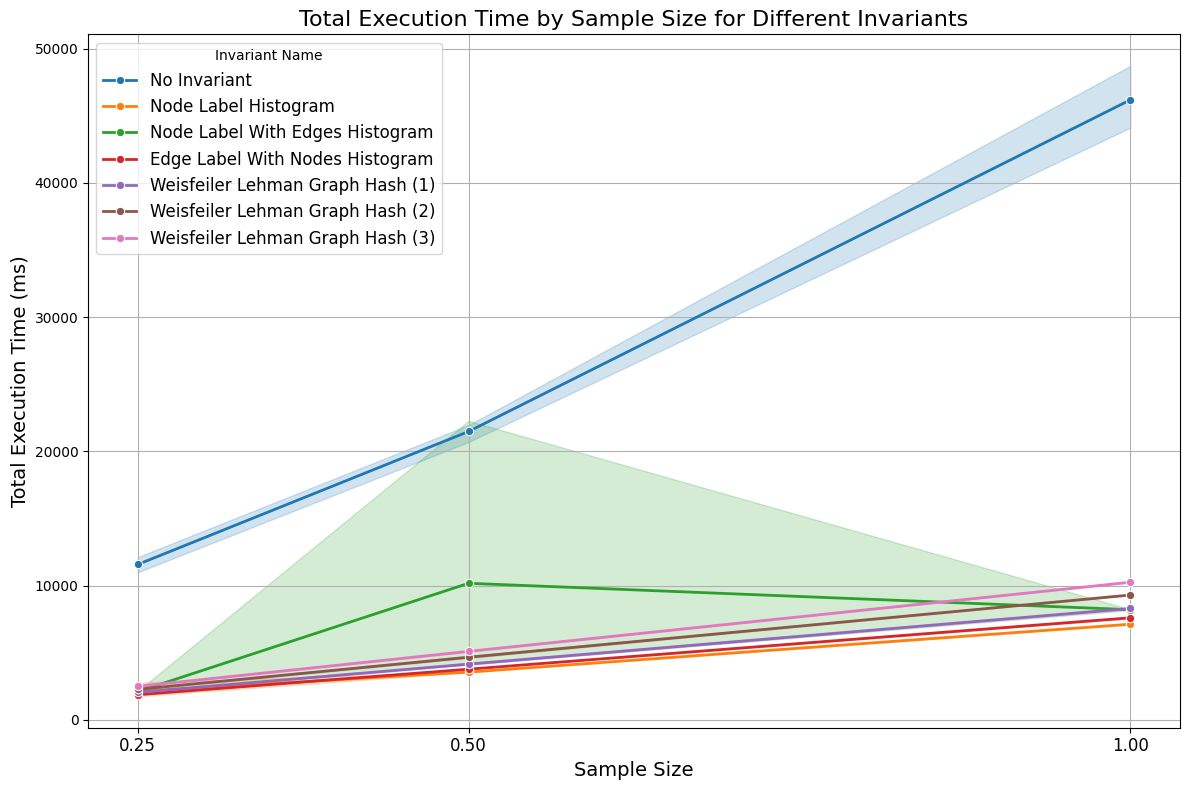

In [66]:
plt.figure(figsize=(12, 8))
sns.lineplot(
    data=isomorphism_scaling_analysis_df, 
    x="sample_size", 
    y="total_execution_time_ms", 
    hue="invariant_name_formatted", 
    marker="o",  # Adds markers for scatter points
    linewidth=2  # Line thickness
)

# Add title and labels
plt.title("Total Execution Time by Sample Size for Different Invariants", fontsize=16)
plt.xlabel("Sample Size", fontsize=14)
plt.ylabel("Total Execution Time (ms)", fontsize=14)

# Adjust legend
plt.legend(title="Invariant Name", fontsize=12)
plt.grid(True)
#plt.yscale("log")
plt.xticks([0.25, 0.5, 1], fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()